<a href="https://colab.research.google.com/github/akitim/SkillFactory_current/blob/main/Unit_2_EDA_Chocolate_bars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preprocess

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
 
pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок
 
import sys
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
sys.path.clear
sys.path.append('/content/gdrive/MyDrive/SkillFactory')
 
def hasletornum(s):
    ls = [ch for ch in s]
    return any(list(map(lambda x: x.isalnum(), ls)))    
#cacao = pd.read_csv('/content/gdrive/MyDrive/SkillFactory/cacao_flavors.csv')

Mounted at /content/gdrive


In [2]:
cacao = pd.read_csv('/content/gdrive/MyDrive/SkillFactory/cacao_flavors.csv')
cacao.columns = ['bar_id','company','specific_origin','ref','review_date','cocoa_percent','company_location','rating','bean_type','bean_origin']
cacao.sample()

,bar_id,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,bean_origin
1271,1272,Pascha,Peru,1137,2013,70%,Peru,2.75,,Peru


#bar_id

Number of unique bar_id's: 1795


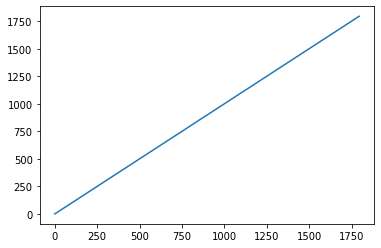

In [3]:
 print(f"Number of unique bar_id's: {cacao.bar_id.nunique()}")
plt.plot(cacao.bar_id)

In [4]:
cacao.drop(['bar_id'], inplace = True, axis = 1)
cacao.sample()

,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,bean_origin
894,Kallari (Ecuatoriana),Diego 60hr/ W.F. blend prototype,248,2008,85%,Ecuador,3.0,,Ecuador


#Задание 2.3.1

In [5]:
print (f"Number of companies in the dataset + empty: {cacao.company.nunique()}")
 
cacao[cacao.company.apply (lambda x: hasletornum(x))].company.value_counts() #index.nunique()

Number of companies in the dataset + empty: 408


Soma                    45
Bonnat                  26
Fresco                  26
Pralus                  25
Domori                  22
                        ..
Loiza                    1
Bronx Grrl Chocolate     1
Kerchner                 1
Chequessett              1
La Pepa de Oro           1
Name: company, Length: 407, dtype: int64

In [6]:
#cacao.company = cacao.company.apply(lambda x: None if x.strip() == '' else x)
cacao.company = cacao.company.apply(lambda x: None if not(hasletornum(x)) else x)

In [7]:
display(pd.DataFrame(cacao.company.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:"#Число 10 взято для ориентира, можно брать другое
      , (cacao.company.value_counts()>10).sum())
#cacao.loc[:, ['company']].info()
cacao.loc[:, ['company']]

,company
Soma,45
Bonnat,26
Fresco,26
Pralus,25
Domori,22
...,...
Loiza,1
Bronx Grrl Chocolate,1
Kerchner,1
Chequessett,1


Значений, встретившихся в столбце более 10 раз: 30


,company
0,A. Morin
1,A. Morin
2,A. Morin
3,A. Morin
4,A. Morin
...,...
1790,Zotter
1791,Zotter
1792,Zotter
1793,Zotter


#Задание 2.3.2

In [9]:
#cacao_ = cacao.copy()
print ("bean_origin data types:\n")
display (pd.DataFrame(cacao.bean_origin.apply(type).value_counts()))
print ()
 
valid_bo = cacao.bean_origin[cacao.bean_origin.apply (lambda x: type(x) == str)]
valid_bo = valid_bo[valid_bo.apply(hasletornum)]
 
print (f"Number of origins in the dataset: {valid_bo.nunique()}\n")
valid_bo.value_counts()

bean_origin data types:



,bean_origin
<class 'str'>,1794
<class 'float'>,1



Number of origins in the dataset: 99



Venezuela                       214
Ecuador                         193
Peru                            165
Madagascar                      145
Dominican Republic              141
                               ... 
Cameroon                          1
Ven., Indonesia, Ecuad.           1
DR, Ecuador, Peru                 1
Guat., D.R., Peru, Mad., PNG      1
Suriname                          1
Name: bean_origin, Length: 99, dtype: int64

In [11]:
#cacao_ = cacao.copy()
print ("specific_origin data types:\n")
display (pd.DataFrame(cacao.specific_origin.apply(type).value_counts()))
print ()
 
valid_so = cacao.specific_origin[cacao.specific_origin.apply (lambda x: type(x) == str)]
valid_so = valid_so[valid_so.apply(hasletornum)]
 
print (f"Number of origins in the dataset: {valid_so.nunique()}\n")
valid_so.value_counts()

specific_origin data types:



,specific_origin
<class 'str'>,1795



Number of origins in the dataset: 1012



Madagascar            55
Peru                  44
Ecuador               39
Dominican Republic    33
Venezuela             21
                      ..
Coopertiva Amazona     1
Napa                   1
Papua Kerafat          1
Pangoa, w/ nibs        1
Acopagro               1
Name: specific_origin, Length: 1012, dtype: int64

Задание 2.3.3

In [12]:
 
print(f"Number of origins met more than 10 times in the dataset: {(valid_so.value_counts() > 10).sum()}")

Number of origins met more than 10 times in the dataset: 15


#ref

count    1795.000000
mean     1035.904735
std       552.886365
min         5.000000
25%       576.000000
50%      1069.000000
75%      1502.000000
max      1952.000000
Name: ref, dtype: float64

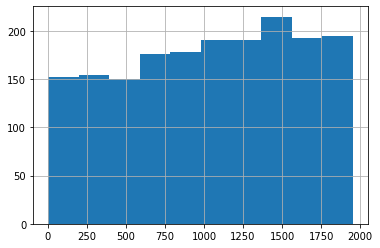

In [21]:
cacao.ref.hist()
cacao.ref.describe()

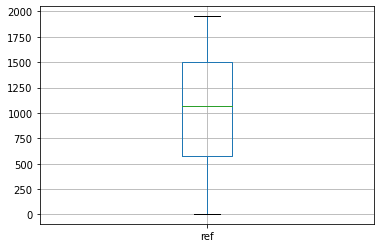

In [25]:
print (' 
cacao.boxplot(['ref'])